### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df = pd.read_csv("Medical Price Dataset.csv")

### Analyzing dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Visualization

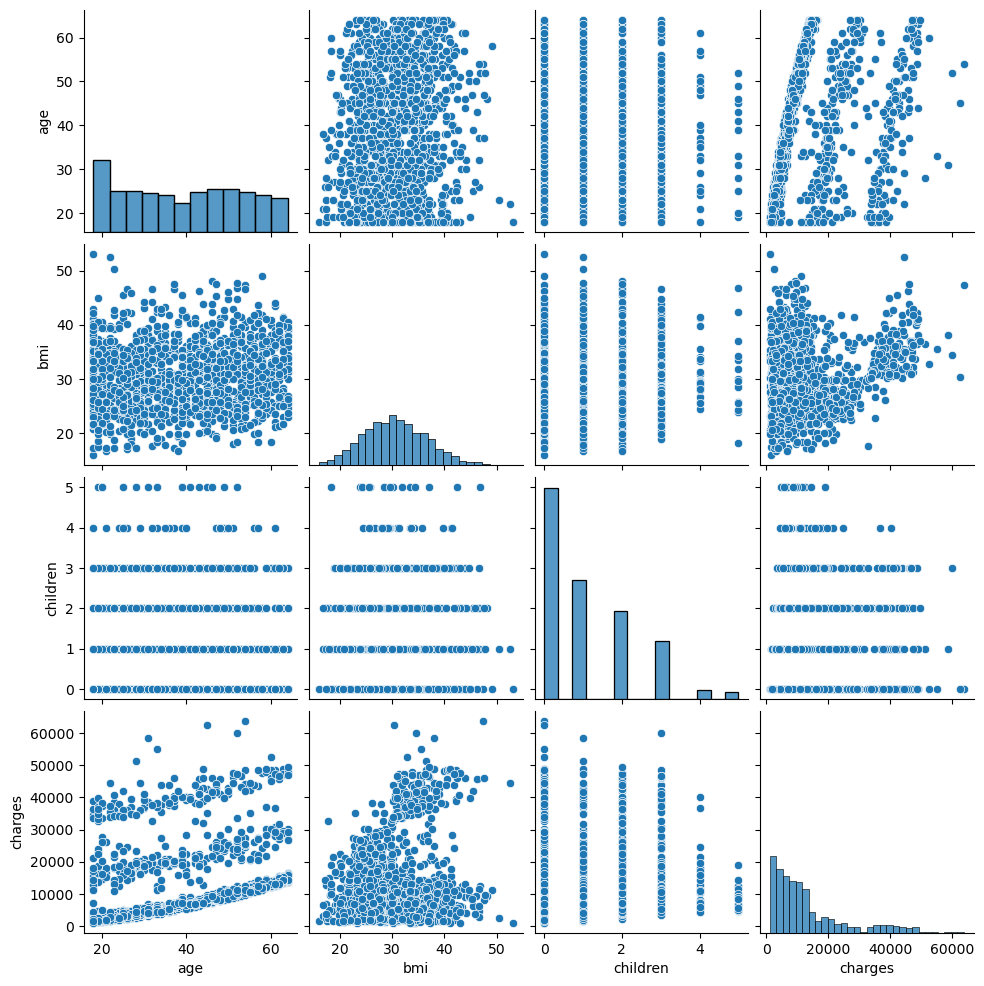

In [4]:
#graphically represent our numerical data.
sns.pairplot(df)

In [5]:
#distribution of data for “charges”.
sns.distplot(df["charges"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

In [6]:
#mutual correlation of numerical categories from our dataset.
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

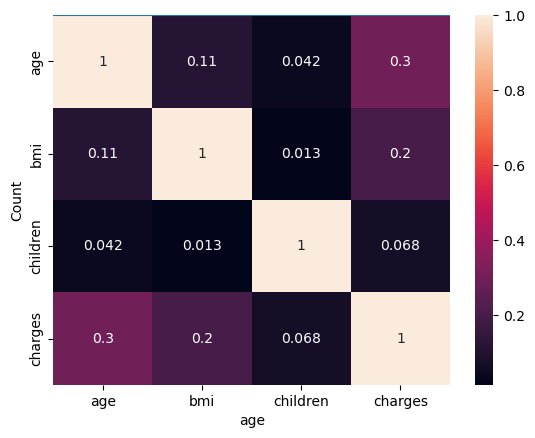

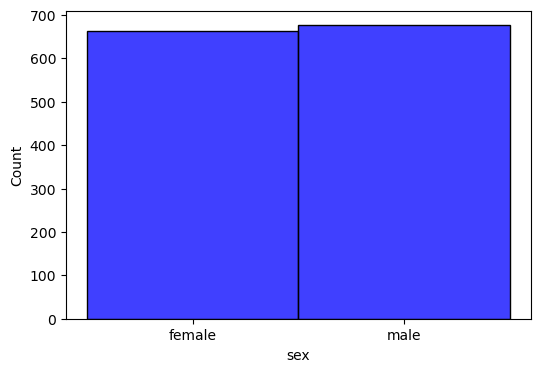

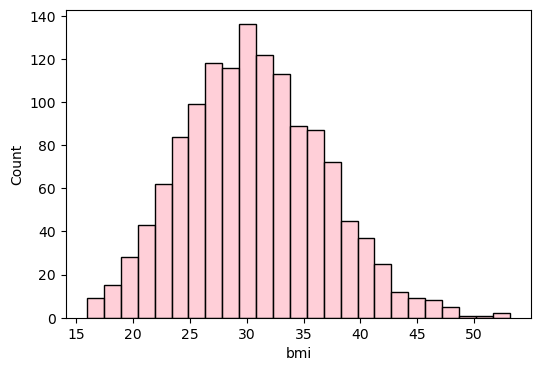

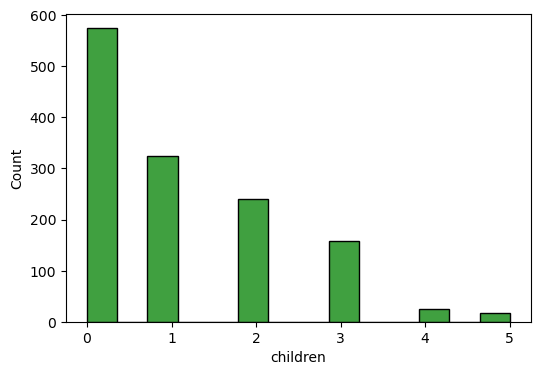

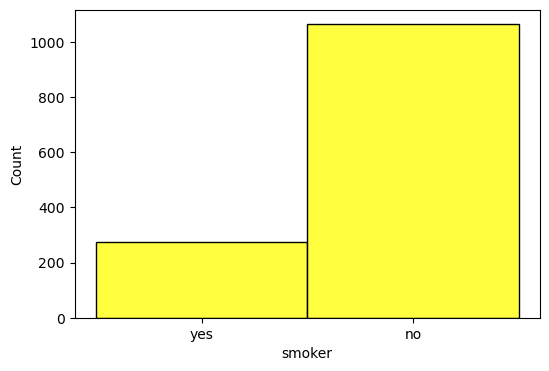

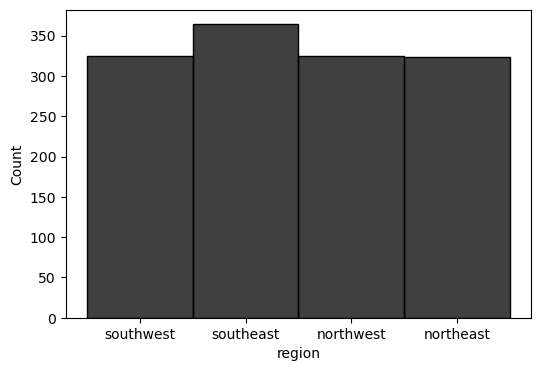

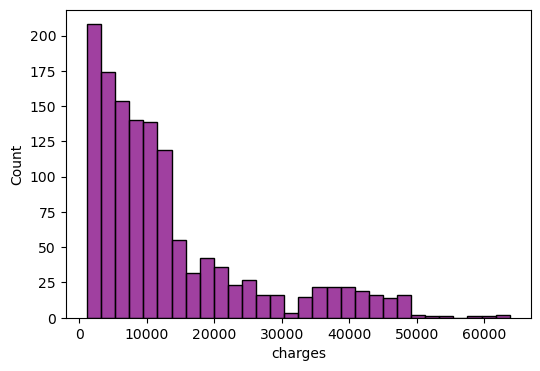

In [7]:
plt.rcParams["figure.figsize"] = (6,4)

sns.histplot(df['age'], color="orange") 
plt.show()

sns.histplot(df['sex'], color="blue")
plt.show()

sns.histplot(df['bmi'], color="pink")
plt.show()

sns.histplot(df['children'], color="green")
plt.show()

sns.histplot(df['smoker'], color="yellow")
plt.show()

sns.histplot(df['region'], color="black")
plt.show()

sns.histplot(df['charges'], color="purple")
plt.show()

### Data pre-processing

In [8]:
#Checking for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#Encoding Sex column
data = [df]
for d in data:
    d.loc[ d['sex'] == 'male', 'sex'] = 0
    d.loc[ d['sex'] == 'female', 'sex'] = 1

In [11]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
#Encoding smoker column
data = [df]
for d in data:
    d.loc[ d['smoker'] == 'no', 'smoker'] = 0
    d.loc[ d['smoker'] == 'yes', 'smoker'] = 1

In [13]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
#Encoding region column
data = [df]
for d in data:
    d.loc[ d['region'] == 'southeast', 'region'] = 0
    d.loc[ d['region'] == 'southwest', 'region'] = 1
    d.loc[ d['region'] == 'northwest', 'region'] = 2
    d.loc[ d['region'] == 'northeast', 'region'] = 3

In [15]:
# Shuffle dataframe using sample function
df = df.sample(frac=1)
df

,age,sex,bmi,children,smoker,region,charges
1133,52,1,18.335,0,0,2,9991.03765
62,64,0,24.700,1,0,2,30166.61817
1086,55,0,28.975,0,0,3,10796.35025
505,37,0,30.875,3,0,2,6796.86325
741,27,0,29.150,0,1,0,18246.49550
...,...,...,...,...,...,...,...
928,62,1,39.160,0,0,0,13470.80440
227,58,1,41.910,0,0,0,24227.33724
871,26,1,29.480,1,0,0,3392.36520
121,18,0,23.750,0,0,3,1705.62450


### Splitting the dataset

In [16]:
# Select ratio
ratio = 0.80

total_rows = df.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
train = df[0:train_size]
test = df[train_size:]

In [17]:
train.shape

(1070, 7)

In [18]:
test.shape

(268, 7)

In [19]:
X_train = train.drop(["charges"],axis=1)
y_train = train["charges"]
X_test = test.drop(["charges"],axis=1)
y_test = test["charges"]

In [20]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

### Model Implementation

In [21]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((6, 1))
    cost_list = []
    
    for i in range(iteration):
        
        #cost function
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        
        #Gradient descent
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        
    return theta, cost_list

In [34]:
iteration = 50
learning_rate = 0.01
theta, cost_list = model(X_train, y_train, learning_rate = learning_rate,iteration = iteration)

### Prediction

In [35]:
predictions=[]
for x in X_test :
    y=((np.dot(x, theta)[0]))
    predictions.append(y)

### Error analysis

In [36]:
def mse(y_test, predictions):
    for i in range(0,268):
        return (y_test[i]-predictions[i])**2
msee=[]
msee.append(mse(y_test, predictions))

print(np.mean(msee))


1.6315508491631088e+148
